# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
503,0.0757,0.1416,0.2051,0.0366,0.0098,0.0024,0.2173,0.0952,0.1416,0.0195,1,1,1,1
33411,0.0073,0.1367,0.1514,0.0024,0.0024,0.0024,0.1294,0.0562,0.3467,0.0464,10,10,4,4
68646,0.1880,0.6934,0.1196,0.0146,0.0024,0.0024,0.2563,0.7666,0.4614,0.2002,2,2,9,9
230672,0.0146,0.0024,0.0024,0.0024,0.0024,0.0024,0.0488,0.1099,0.0024,0.0635,5,0,16,16
286694,0.0122,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0562,0.0024,0.0415,0,0,0,0


In [3]:
raw_data.shape

(471483, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

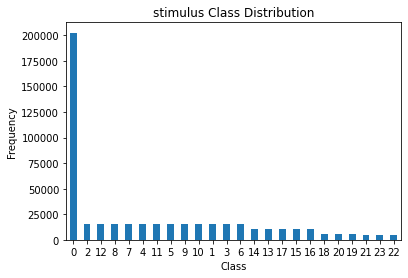

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
370246,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0879,0.1563,0.7056,0.1709,0,0,0,0
296841,0.3809,0.1392,0.7251,0.1123,0.0269,0.0708,0.3198,0.7813,0.2612,0.0439,5,5,6,6
92483,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.0269,0.0024,0.0024,0,0,0,0
464416,0.2954,0.1270,0.0098,0.0024,0.0317,0.0024,0.2246,1.3916,0.1611,0.0098,2,2,23,23
345326,0.2222,0.0024,0.1318,0.0024,0.0024,0.0024,0.1025,0.3784,0.2637,0.1709,4,4,11,11


In [12]:
raw_data.shape

(378535, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Principal Component Analysis (PCA)

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [18]:
#Apply PCA to see how many features we need to select
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 3) 
covar_matrix.fit(X)

#Calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var

array([50.7, 64.1, 74.8])

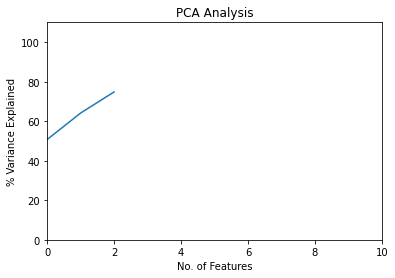

In [19]:
#Plot graph 

plt.ylabel('% Variance Explained')
plt.xlabel('No. of Features')
plt.title('PCA Analysis')
plt.ylim(0,110)
plt.xlim(0,10)
plt.plot(var)

In [20]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [21]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [22]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred1 = tree.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 58.517706420806526


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     40005
           1       0.22      0.22      0.22      2108
           2       0.36      0.34      0.35      1923
           3       0.31      0.30      0.30      2110
           4       0.24      0.23      0.23      1957
           5       0.22      0.22      0.22      2046
           6       0.24      0.24      0.24      2187
           7       0.22      0.23      0.22      1753
           8       0.17      0.18      0.18      1740
           9       0.20      0.21      0.21      1876
          10       0.22      0.21      0.22      2030
          11       0.20      0.20      0.20      1940
          12       0.19      0.19      0.19      2123
          13       0.28      0.27      0.27      1332
          14       0.28      0.28      0.28      1226
          15       0.38      0.40      0.39      1161
          16       0.29      0.26      0.28      1543
 

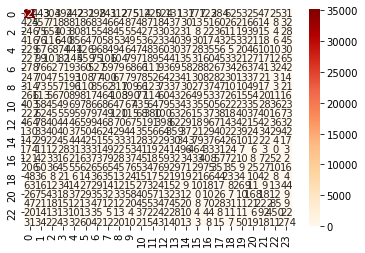

In [25]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 3.033193760154279
MSE: 32.96059809528841
RMSE: 5.741132126618269


In [27]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.5822877635710136
Recall Score :  0.5851770642080653
f1_score :  0.5836814833255761


# KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 64.64791895069149


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     40005
           1       0.26      0.32      0.29      2108
           2       0.40      0.41      0.40      1923
           3       0.37      0.35      0.36      2110
           4       0.29      0.30      0.30      1957
           5       0.28      0.28      0.28      2046
           6       0.33      0.31      0.32      2187
           7       0.32      0.27      0.29      1753
           8       0.27      0.21      0.23      1740
           9       0.29      0.25      0.27      1876
          10       0.36      0.22      0.27      2030
          11       0.28      0.20      0.24      1940
          12       0.33      0.22      0.27      2123
          13       0.44      0.30      0.35      1332
          14       0.39      0.33      0.36      1226
          15       0.54      0.44      0.48      1161
          16       0.40      0.31      0.35      1543
 

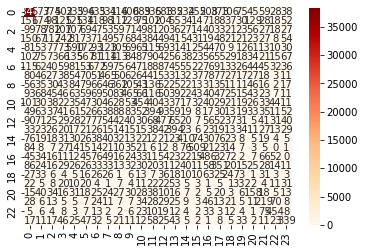

In [31]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 2.6418693119526595
MSE: 29.477062887183482
RMSE: 5.429278302609241


In [33]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.6124504098692729
Recall Score :  0.6464791895069149
f1_score :  0.6251750698764573


# ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [35]:
y_pred5 = extratree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 64.80642476917589


Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.90     40005
           1       0.32      0.27      0.29      2108
           2       0.51      0.38      0.44      1923
           3       0.46      0.34      0.39      2110
           4       0.33      0.30      0.32      1957
           5       0.28      0.27      0.28      2046
           6       0.33      0.28      0.30      2187
           7       0.31      0.26      0.29      1753
           8       0.25      0.21      0.23      1740
           9       0.28      0.28      0.28      1876
          10       0.35      0.22      0.27      2030
          11       0.25      0.22      0.24      1940
          12       0.30      0.25      0.27      2123
          13       0.40      0.30      0.34      1332
          14       0.34      0.36      0.35      1226
          15       0.48      0.46      0.47      1161
          16       0.36      0.34      0.35      1543
 

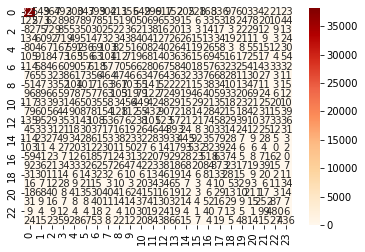

In [37]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 2.564214669713501
MSE: 27.993646558442418
RMSE: 5.290902244271994


In [39]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.6173745426476407
Recall Score :  0.648064247691759
f1_score :  0.6296649597172485


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 65.11022758793771


Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     40005
           1       0.32      0.29      0.30      2108
           2       0.50      0.38      0.44      1923
           3       0.45      0.34      0.38      2110
           4       0.33      0.30      0.31      1957
           5       0.29      0.28      0.29      2046
           6       0.35      0.30      0.32      2187
           7       0.32      0.26      0.29      1753
           8       0.26      0.22      0.24      1740
           9       0.28      0.28      0.28      1876
          10       0.34      0.22      0.27      2030
          11       0.26      0.23      0.25      1940
          12       0.30      0.24      0.27      2123
          13       0.39      0.31      0.35      1332
          14       0.35      0.37      0.36      1226
          15       0.49      0.47      0.48      1161
          16       0.39      0.35      0.37      1543
 

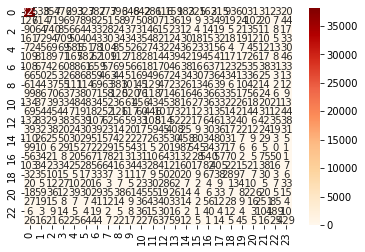

In [43]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 2.532539923653031
MSE: 27.62773587647113
RMSE: 5.2562092687098305


In [45]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.621705881431022
Recall Score :  0.6511022758793771
f1_score :  0.6337174209852765


# XGBoost

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
y_pred4 = xgb.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 65.23571136090453


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     40005
           1       0.32      0.27      0.29      2108
           2       0.64      0.35      0.45      1923
           3       0.53      0.31      0.40      2110
           4       0.35      0.27      0.30      1957
           5       0.27      0.32      0.29      2046
           6       0.36      0.26      0.30      2187
           7       0.34      0.25      0.29      1753
           8       0.29      0.21      0.25      1740
           9       0.26      0.33      0.29      1876
          10       0.51      0.18      0.26      2030
          11       0.27      0.22      0.24      1940
          12       0.31      0.24      0.27      2123
          13       0.52      0.26      0.35      1332
          14       0.31      0.42      0.36      1226
          15       0.45      0.48      0.46      1161
          16       0.40      0.31      0.35      1543
 

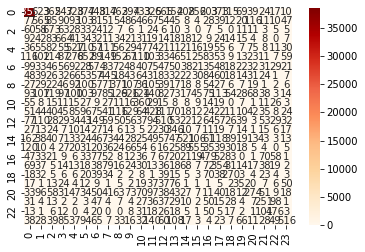

In [49]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 2.5408218526688415
MSE: 28.018518763126263
RMSE: 5.293252191528972


In [51]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.6266747147835063
Recall Score :  0.6523571136090454
f1_score :  0.6304757273046204
